# Tensorflow on CoCalc

Make sure to use the Jupyter Kernel **"Python 3 (Anaconda or Ubuntu)"**

## Say Hello to Tensorflow!

In [1]:
import tensorflow as tf
print(tf.__version__)
tf

1.9.0


<module 'tensorflow' from '/ext/anaconda5/lib/python3.6/site-packages/tensorflow/__init__.py'>

In [2]:
# Import data
mnist = input_data.read_data_sets(FLAGS.data_dir,
                                one_hot=True,
                                fake_data=FLAGS.fake_data)

sess = tf.InteractiveSession()
# Create a multilayer model.

# Input placeholders
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, [None, 784], name='x-input')
    y_ = tf.placeholder(tf.float32, [None, 10], name='y-input')

with tf.name_scope('input_reshape'):
    image_shaped_input = tf.reshape(x, [-1, 28, 28, 1])
    tf.summary.image('input', image_shaped_input, 10)

# We can't initialize these variables to 0 - the network will get stuck.
def weight_variable(shape):
    """Create a weight variable with appropriate initialization."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    """Create a bias variable with appropriate initialization."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def variable_summaries(var):
    """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
            tf.summary.scalar('stddev', stddev)
            tf.summary.scalar('max', tf.reduce_max(var))
            tf.summary.scalar('min', tf.reduce_min(var))
            tf.summary.histogram('histogram', var)

NameError: name 'input_data' is not defined

In [3]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
sess.run(hello)

b'Hello, TensorFlow!'

In [4]:
# check your version of python
import sys
sys.version

'3.6.5 | packaged by conda-forge | (default, Apr  6 2018, 13:39:56) \n[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]'

In [5]:
# just some general setup
import numpy as np
from IPython.display import clear_output, Image, display
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 8)

In [6]:
a = tf.constant(10)
b = tf.constant(32)
sess.run(a + b)

42

In [7]:
# check your version of python
import sys
sys.version

'3.6.5 | packaged by conda-forge | (default, Apr  6 2018, 13:39:56) \n[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]'

In [8]:
# just some general setup
import numpy as np
from IPython.display import clear_output, Image, display
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 8)

### Visualization Function

In [9]:
def DisplayFractal(a, fmt='jpeg'):
    """
    Display an array of iteration counts as a
    colorful picture of a fractal.
    """
    a_cyclic = (2 * np.pi * a / 20.0)[:,:,np.newaxis] # .reshape(list(a.shape)+[1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    plt.imshow(a)

## Mandelbrot Set (from the Tutorial)

In [10]:
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

In [11]:
sess = tf.InteractiveSession()

In [12]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros(Z.shape))

In [13]:
tf.initialize_all_variables().run()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [14]:
# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs

# Have we diverged with this new value?
not_diverged = tf.complex_abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, "float32"))
)

AttributeError: module 'tensorflow' has no attribute 'complex_abs'

In [15]:
%time
for i in range(200):
    step.run()

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 8.58 µs


NameError: name 'step' is not defined

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.48 µs


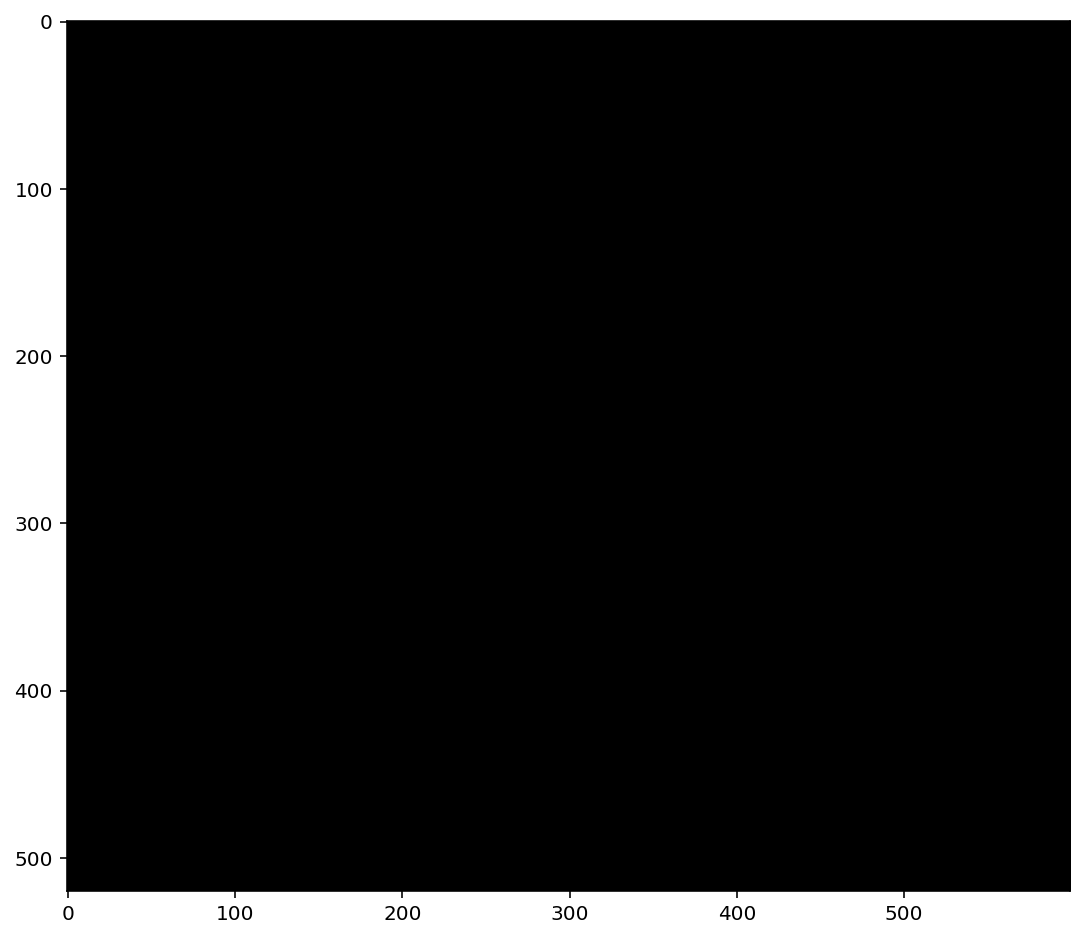

In [16]:
%time
DisplayFractal(ns.eval())

In [17]:
sess.close()

## Julia Set

In [18]:
Y, X = np.mgrid[-1.3:1.3:0.005, -1.3:1.3:0.005]
Z = X + 1j*Y
C = 0.12 + .63j

In [19]:
sess = tf.InteractiveSession()

In [20]:
xx = tf.constant(Z.astype("complex64"))

jwork = tf.Variable(xx)
jconst = tf.constant(np.complex64(C))
julia = tf.Variable(tf.zeros(Z.shape))

tf.initialize_all_variables().run()

In [21]:
jwork_ = jwork*jwork + jconst

not_diverged = tf.complex_abs(jwork_) < 4

julia_step = tf.group(
    jwork.assign(jwork_),
    julia.assign_add(tf.cast(not_diverged, "float32"))
)

AttributeError: module 'tensorflow' has no attribute 'complex_abs'

In [0]:
%time
for i in range(200):
    julia_step.run()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


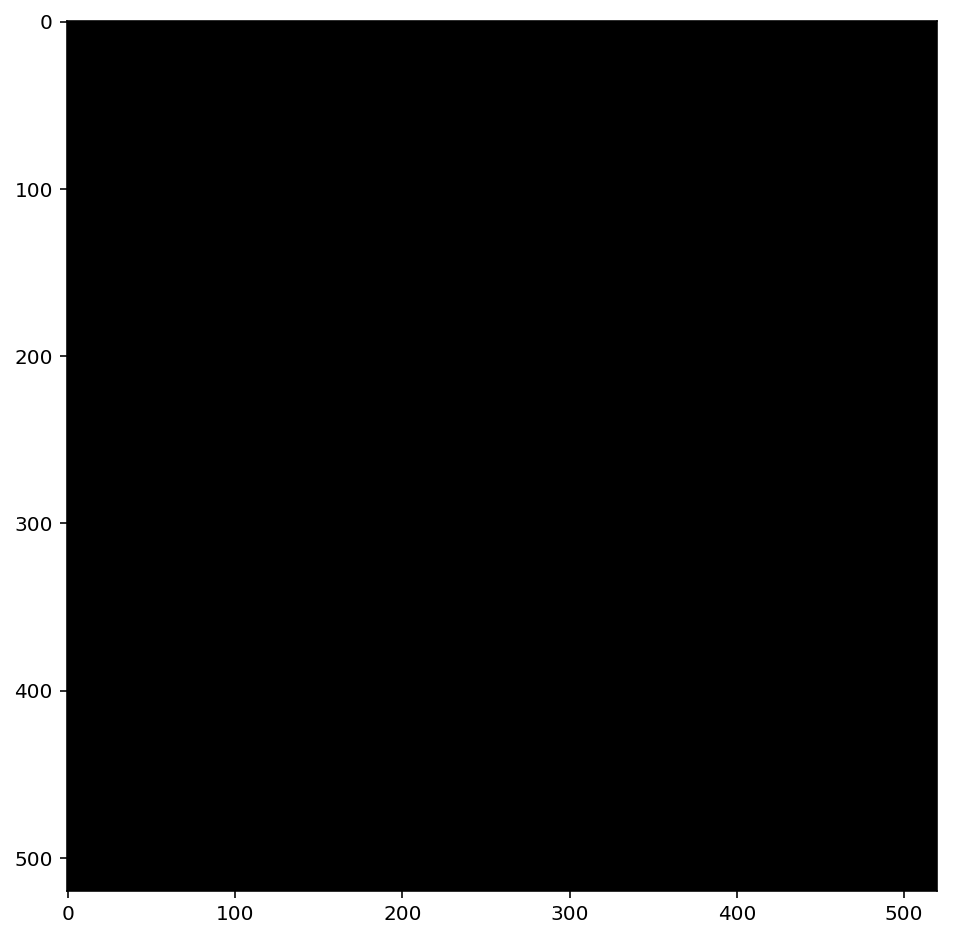

In [22]:
%time
DisplayFractal(julia.eval())

In [23]:
sess.close()

## Does skflow also work?

https://github.com/tensorflow/skflow/

In [24]:
import random

from sklearn import datasets, cross_validation, metrics
from sklearn import preprocessing

import skflow
skflow

ImportError: cannot import name 'cross_validation'

In [0]:
random.seed(42)

# Load dataset
boston = datasets.load_boston()
X, y = boston.data, boston.target

# Split dataset into train / test
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,
    test_size=0.2, random_state=42)

# scale data (training set) to 0 mean and unit Std. dev
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)

# Build 2 layer fully connected DNN with 10, 10 units respecitvely.
regressor = skflow.TensorFlowDNNRegressor(hidden_units=[10, 10],
    steps=5000, learning_rate=0.1, batch_size=1)

# Fit
regressor.fit(X_train, y_train)

# Predict and score
score = metrics.mean_squared_error(regressor.predict(scaler.fit_transform(X_test)), y_test)

print('MSE: {0:f}'.format(score))

In [0]:
with tf.Session() as sess:
    x = tf.Variable(21)
    tf.initialize_all_variables().run()
    tf.group(x.assign(x + x)).run()
    print(x.eval())